<h1 style="text-align:center">New York City Taxi with OSRM</h1>

This dataset is made by oscarleo to be helpful for the New York Taxi Competition.
The link for the dataset can be find below:  
https://www.kaggle.com/oscarleo/new-york-city-taxi-with-osrm <br>
For each trip, the fastest route is displayed.

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_OSRM1 = pd.read_csv('fastest_routes_train_part_1.csv')
train_OSRM2 = pd.read_csv('fastest_routes_train_part_2.csv')
test_OSRM = pd.read_csv('fastest_routes_test.csv')

<h3 style="text-align:center">Data exploration</h3>

We combine the 2 part of the provided OSRM files into one dataframe

In [4]:
# train_OSRM = pd.concat([train_OSRM1, train_OSRM2], ignore_index=True)
train_OSRM = pd.concat([train_OSRM1, train_OSRM2])

We will add the trip duration column to the OSRM dataframe in order to be able to do some Explanatory Data Analysis (EDA)

In [5]:
train_OSRM['trip_duration'] = train_df['trip_duration']

In [6]:
train_OSRM.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list,trip_duration
0,id2875421,columbus circle,east 65th street,2009.1,164.9,5,columbus circle|central park west|65th street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73....",455
1,id2377394,2nd avenue,washington square west,2513.2,332.0,6,2nd avenue|east 13th street|5th avenue|washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9...",663
2,id3504673,greenwich street,broadway,1779.4,235.8,4,greenwich street|park place|broadway|broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74....",2124
3,id2181028,broadway,west 81st street,1614.9,140.1,5,broadway|west 86th street|columbus avenue|west...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73....",429
4,id0801584,lexington avenue,west 31st street,1393.5,189.4,5,lexington avenue|east 27th street|madison aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73....",435


Check if there is any missing value in the provided dataset

In [7]:
train_OSRM.isnull().sum()

id                      0
starting_street         0
end_street              0
total_distance          0
total_travel_time       0
number_of_steps         0
street_for_each_step    0
distance_per_step       0
travel_time_per_step    0
step_maneuvers          0
step_direction          0
step_location_list      0
trip_duration           0
dtype: int64

<u>Types</u>

In [8]:
train_OSRM.dtypes

id                       object
starting_street          object
end_street               object
total_distance          float64
total_travel_time       float64
number_of_steps           int64
street_for_each_step     object
distance_per_step        object
travel_time_per_step     object
step_maneuvers           object
step_direction           object
step_location_list       object
trip_duration             int64
dtype: object

We observe many object (i.e. string) values, which will need to be preprocessed for the machine learning algorithms.

<h3 style="text-align:center">Data Analysis</h3>

In [9]:
train_OSRM.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list,trip_duration
0,id2875421,columbus circle,east 65th street,2009.1,164.9,5,columbus circle|central park west|65th street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73....",455
1,id2377394,2nd avenue,washington square west,2513.2,332.0,6,2nd avenue|east 13th street|5th avenue|washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9...",663
2,id3504673,greenwich street,broadway,1779.4,235.8,4,greenwich street|park place|broadway|broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74....",2124
3,id2181028,broadway,west 81st street,1614.9,140.1,5,broadway|west 86th street|columbus avenue|west...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73....",429
4,id0801584,lexington avenue,west 31st street,1393.5,189.4,5,lexington avenue|east 27th street|madison aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73....",435


<u>Correlation with trip duration</u>

<u>Number of steps</u>

In [10]:
train_OSRM['number_of_steps'].describe()

count    1.458643e+06
mean     7.547118e+00
std      4.432500e+00
min      2.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      4.600000e+01
Name: number_of_steps, dtype: float64

There are between 2 and 46 steps to reach the
desired destinations.

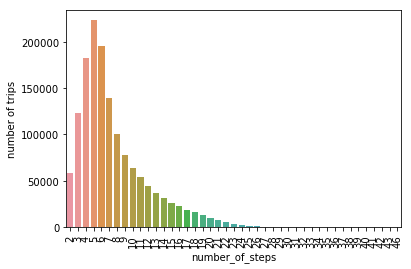

In [11]:
sns.countplot(x='number_of_steps', data=train_OSRM)
plt.xticks(rotation=90)
plt.ylabel('number of trips')
plt.show()

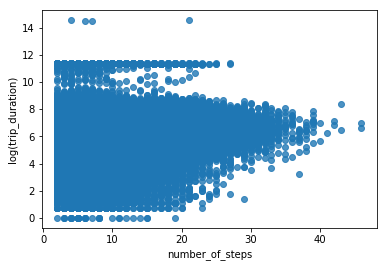

In [12]:
target = np.log(train_OSRM['trip_duration'])

sns.regplot(x='number_of_steps', y=target, data=train_OSRM,
           fit_reg=False)

plt.ylabel('log(trip_duration)')

<u>Total travel time</u>

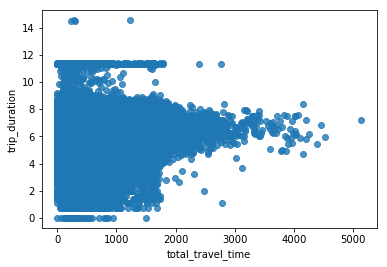

In [13]:
target = np.log(train_OSRM['trip_duration'])

transform_travel_time = np.log(train_OSRM['total_travel_time'])

sns.regplot(x='total_travel_time', y=target, data=train_OSRM,
           fit_reg=False)

# sns.regplot(x=transform_travel_time, y=target, data=train_OSRM, fit_reg=False)

<h3 style="text-align:center">Feature Engineering</h3>

In [14]:
train_OSRM.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list,trip_duration
0,id2875421,columbus circle,east 65th street,2009.1,164.9,5,columbus circle|central park west|65th street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73....",455
1,id2377394,2nd avenue,washington square west,2513.2,332.0,6,2nd avenue|east 13th street|5th avenue|washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9...",663
2,id3504673,greenwich street,broadway,1779.4,235.8,4,greenwich street|park place|broadway|broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74....",2124
3,id2181028,broadway,west 81st street,1614.9,140.1,5,broadway|west 86th street|columbus avenue|west...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73....",429
4,id0801584,lexington avenue,west 31st street,1393.5,189.4,5,lexington avenue|east 27th street|madison aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73....",435


<u>Step maneuvers</u>

We create a set where we will store the unique maneuvers. We split the values in the step_maneuver column to get the maneuvers stored as a list.

In [ ]:
unique_maneuvers = set()

step_maneuvers_train = train_OSRM['step_maneuvers'].str.split('|').values
step_maneuvers_test  = test_OSRM['step_maneuvers'].str.split('|').values

for step in step_maneuvers_train:
    for maneuver in step:
        unique_maneuvers.add(maneuver)

print(unique_maneuvers)

We convert unique_maneuvers to a list so that we can sort it.
We also remove arrive and depart since both of these maneuvers appear in every trip.

In [ ]:
unique_maneuvers = list(unique_maneuvers)
unique_maneuvers.sort() # string sort (based on 1st character)

unique_maneuvers = [x for x in unique_maneuvers if x not in ['arrive', 'depart']]

print(unique_maneuvers)

We then create a numpy array to store the maneuver counts. Afterwards we iterate over the splitted values from above and count the occurrence of every type of maneuver.

In [ ]:
action_counts_train = np.zeros(shape=(len(train_df), len(unique_maneuvers)))
action_counts_test = np.zeros(shape=(len(test_df), len(unique_maneuvers)))

In [ ]:
action_counts_train[:3]

In [ ]:
for i, step in enumerate(step_maneuvers_train):
    for j, maneuver in enumerate(unique_maneuvers):
        count = step.count(maneuver)
        action_counts_train[i, j] = count

Finally, we add the values for the action count array to our training and testing data

In [ ]:
for i, maneuver in enumerate(unique_maneuvers):
    column_title = '{}_count'.format(maneuver)
    train_OSRM[column_title] = action_counts_train[:, i]
    test_OSRM[column_title] = action_counts_test[:, i]

Delete unnecessary columns

In [15]:
def drop_OSRM_columns(dataset):
    drop_columns = ['starting_street', 'end_street', 'street_for_each_step', 
                    'distance_per_step', 'travel_time_per_step', 'step_maneuvers', 
                    'step_direction', 'step_location_list']
    
    dataset.drop(drop_columns, axis=1, inplace=True)

drop_OSRM_columns(train_OSRM)
drop_OSRM_columns(test_OSRM)

In [16]:
train_OSRM.head()

,id,total_distance,total_travel_time,number_of_steps,trip_duration
0,id2875421,2009.1,164.9,5,455
1,id2377394,2513.2,332.0,6,663
2,id3504673,1779.4,235.8,4,2124
3,id2181028,1614.9,140.1,5,429
4,id0801584,1393.5,189.4,5,435


<h3 style="text-align:center">Saving files</h3>

In [17]:
train_OSRM.drop(['trip_duration'], axis=1, inplace=True)

In [18]:
# train_OSRM.to_pickle('train_OSRM.p')
# test_OSRM.to_pickle('test_OSRM.p')

train_OSRM.to_pickle('train_OSRM_maneuvers.p')
test_OSRM.to_pickle('test_OSRM_maneuvers.p')